In [227]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [228]:
# Ignore warning

import warnings
warnings.filterwarnings("ignore")

In [229]:
pd.set_option('display.max_columns', 500)

In [230]:
# Reading data set

bike_df = pd.read_csv("car.csv")

# Top 5 rows

bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [231]:
# Shape of data set

bike_df.shape

(730, 16)

In [232]:
# Info

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [233]:
# Statistical description of numerical data

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [234]:
# Checking null value

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### No null value present

In [235]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [236]:
# drop instant column

bike_df = bike_df.drop("instant", axis=1)

In [237]:
bike_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [238]:
# Map season : season (1:spring, 2:summer, 3:fall, 4:winter)

bike_df.season = bike_df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [239]:
bike_df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [240]:
# same way we will map 
# mnth : month ( 1 to 12)
# weekday : day of the week

bike_df.mnth = bike_df.mnth.map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 
                            10:"Oct", 11:"Nov", 12:"Dec"})

bike_df.weekday = bike_df.weekday.map({1:"Mon", 2:"Tue", 3:"Wed", 4:"Thur", 5:"Fri", 6:"Sat", 7:"Sun"})

In [241]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Thur,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [242]:
bike_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [243]:
# Mapping weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

bike_df.weathersit = bike_df.weathersit.map({1:"Clear_Few Clouds", 2:"Mist", 3:"Rainy"})

In [244]:
# drop variable casual and registered

bike_df = bike_df.drop(["casual", "registered"], axis=1)

In [245]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,Jan,0,Wed,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,Jan,0,Thur,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,Jan,0,Fri,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


# EDA

#### Numerical Variable

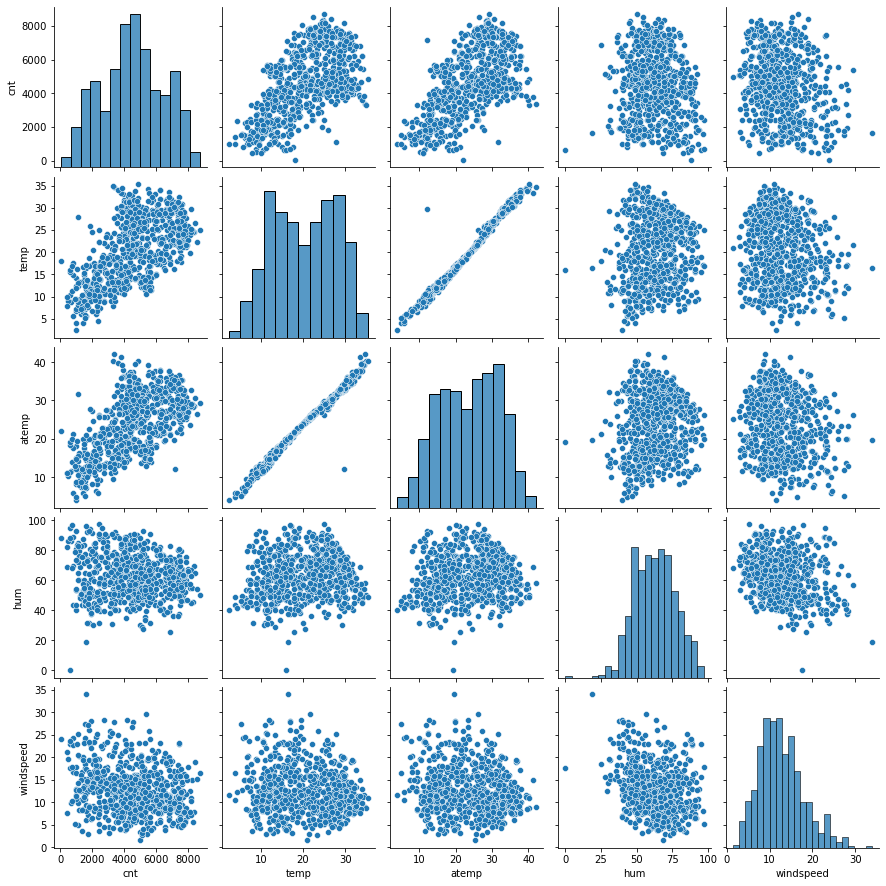

In [246]:
sns.pairplot(bike_df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

##### Conclusion :-

Cnt and atemp show some linear relationship.

#### Categorical Variables

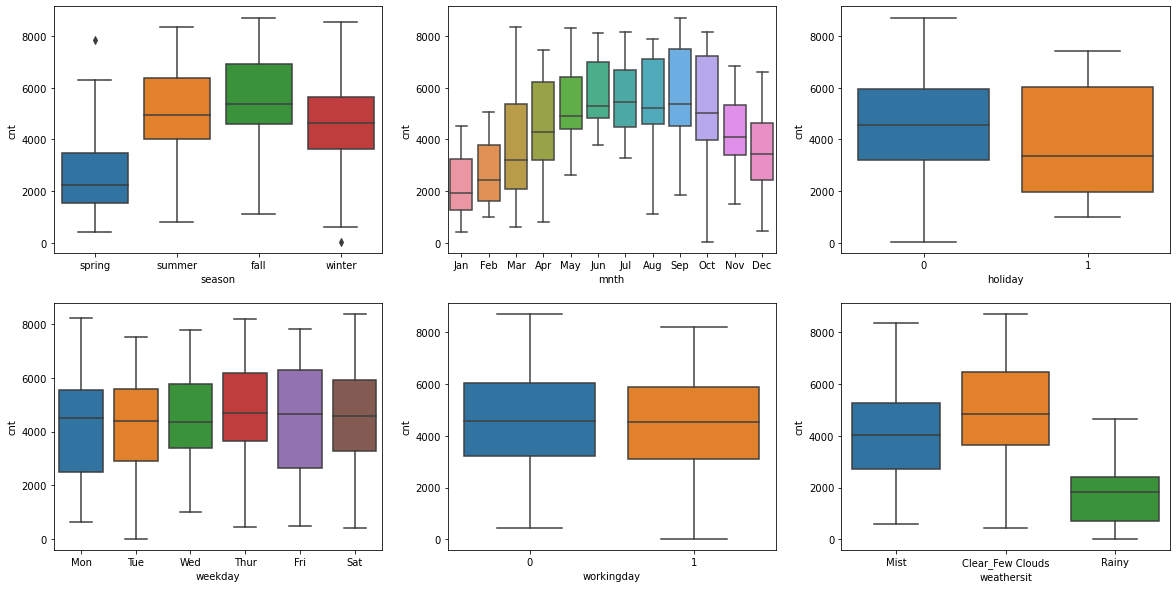

In [247]:
plt.figure(figsize=[20,10])

plt.subplot(2,3,1)
sns.boxplot(x="season", y="cnt", data=bike_df)

plt.subplot(2,3,2)
sns.boxplot(x="mnth", y="cnt", data=bike_df)

plt.subplot(2,3,3)
sns.boxplot(x="holiday", y="cnt", data=bike_df)

plt.subplot(2,3,4)
sns.boxplot(x="weekday", y="cnt", data=bike_df)

plt.subplot(2,3,5)
sns.boxplot(x="workingday", y="cnt", data=bike_df)

plt.subplot(2,3,6)
sns.boxplot(x="weathersit", y="cnt", data=bike_df)

plt.show()

##### Conclusion :-

1. Fall season has the highest count followed by Summer and Winter.
2. Holiday and Working day doesn't have any impact on bike share count.
3. Month Aug, Sep, Oct shows the highest count in the bike share.
4. Clear weather has highest bike share count.

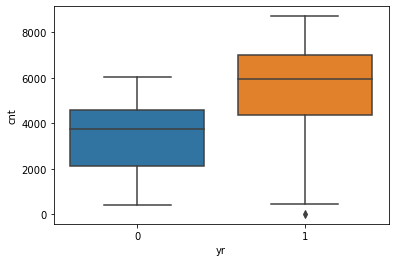

In [248]:
# Cnt and Year

sns.boxplot(x="yr", y="cnt", data=bike_df)
plt.show()

The number of bike shares increased in 2019

In [249]:
bike_df = bike_df.drop("dteday", axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [250]:
# Dummy encoding

dum_var = bike_df[["season", "mnth", "weekday", "weathersit"]]

dummy = pd.get_dummies(dum_var, drop_first=True)

dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Rainy
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [251]:
# Concat bike_df and dummy data set

bike_df = pd.concat([dummy, bike_df], axis=1)

# drop ["season", "mnth", "weekday", "weathersit"] from bike_df, since we have already created the dummy variable

bike_df = bike_df.drop(["season", "mnth", "weekday", "weathersit"], axis=1)

# Final Data set

bike_df.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Rainy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [252]:
bike_df.shape

(730, 29)

# Splitting the Data Set into Train and Test 

In [253]:
df_train, df_test = train_test_split(bike_df, train_size=0.7, test_size=0.3, random_state=100)

In [254]:
df_train.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Rainy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,10.489153,11.5850,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


# Rescaling 

In [255]:
scaler = MinMaxScaler()

In [256]:
# variable to scaled

num_var = ["temp", "atemp", "hum", "windspeed", "cnt"]

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [257]:
# Checking the scaled data

df_train.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Rainy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


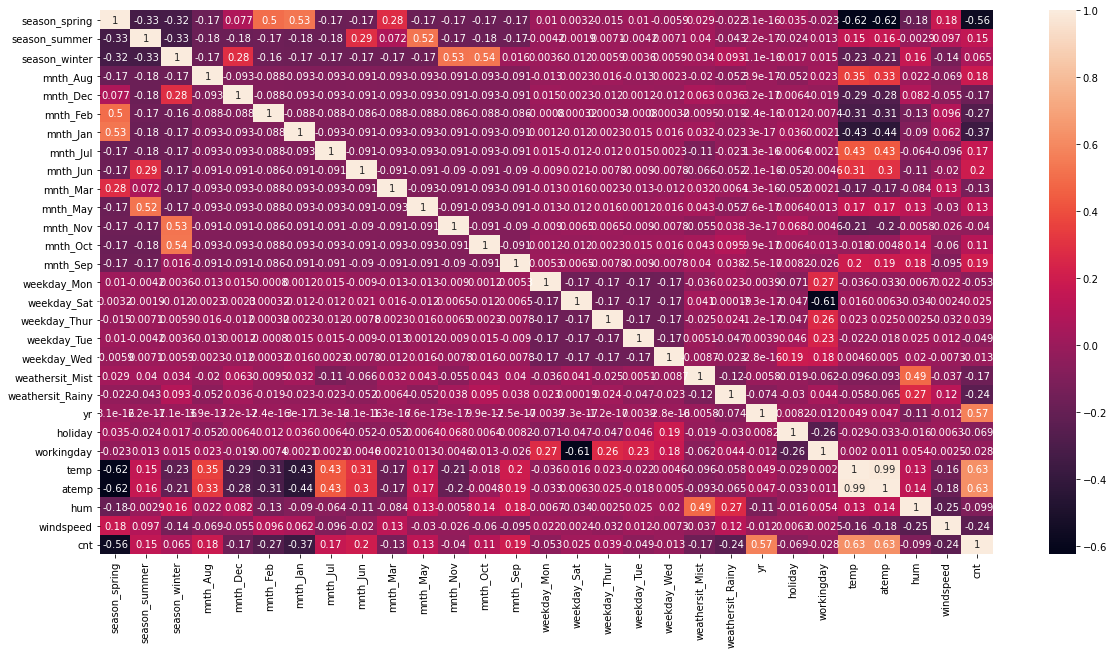

In [258]:
# Checking Correlation

plt.figure(figsize = (20, 10))
sns.heatmap(bike_df.corr(),annot=True)
plt.show()

In [259]:
# Split the Train Data into X and Y

y_train = df_train.pop("cnt")
X_train = df_train

In [260]:
X_train.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Rainy,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475


In [261]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# RFE model building

In [262]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Rfe for feature selection

rfe = RFE(lm, 15)

# fit model

rfe = rfe.fit(X_train, y_train)

In [263]:
# Checking columns selected by rfe

col = X_train.columns[rfe.support_]
col

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Mist',
       'weathersit_Rainy', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [264]:
# Checking columns not selected by rfe

X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Thur', 'weekday_Tue',
       'weekday_Wed', 'workingday', 'atemp'],
      dtype='object')

### Model -1 

In [265]:
# Build model using column seleted by rfe

X_train_rfe = X_train[col]

In [267]:
# Checking VIF


vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,30.94
12,temp,17.80
14,windspeed,4.72
0,season_spring,4.37
2,season_winter,4.06
1,season_summer,2.81
8,weathersit_Mist,2.32
10,yr,2.09
6,mnth_Nov,1.83
4,mnth_Jan,1.75


In [268]:
# add constant

X_train_lm1 = sm.add_constant(X_train_rfe)

# fit model

lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [269]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          3.34e-189
Time:                        22:58:34   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3202      0.036      8.886      0.000       0.249       0.391
season_spring       -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer        0.0408      0.015      2.659      0.008       0.011       0.071
season_winter        0.1034      0.018      5.763      0.000       0.068       0.139
mnth_Dec            -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan            -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_Jul            -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov            -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sep             0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Mist     -0.0559      0.010     -5.338      0.000      -0.076      -0.035
weathersit_Rainy    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
yr                   0.2303      0.008     28.511      0.000       0.214       0.246
holiday             -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                 0.4800      0.037     12.977      0.000       0.407       0.553
hum                 -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed           -0.1885      0.026     -7.312      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model - 2

In [270]:
# Droping column "hum"

X_train_new = X_train_rfe.drop(["hum"], axis=1)

In [272]:
# Checking VIF


vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
2,season_winter,2.94
0,season_spring,2.89
1,season_summer,2.23
10,yr,2.07
6,mnth_Nov,1.80
4,mnth_Jan,1.66
5,mnth_Jul,1.59
8,weathersit_Mist,1.56


In [273]:
# add constant

X_train_lm2 = sm.add_constant(X_train_new)

# fit model

lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [274]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.57e-186
Time:                        23:02:13   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2466      0.032      7.679      0.000       0.184       0.310
season_spring       -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer        0.0333      0.015      2.148      0.032       0.003       0.064
season_winter        0.0887      0.018      4.951      0.000       0.053       0.124
mnth_Dec            -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_Jan            -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_Jul            -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_Nov            -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_Sep             0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_Mist     -0.0814      0.009     -9.359      0.000      -0.099      -0.064
weathersit_Rainy    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
yr                   0.2343      0.008     28.709      0.000       0.218       0.250
holiday             -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                 0.4377      0.036     12.083      0.000       0.366       0.509
windspeed           -0.1586      0.025     -6.290      0.000      -0.208      -0.109
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model - 3

In [275]:
# Drop season_summer

X_train_new = X_train_new.drop(["season_summer"], axis=1)

In [276]:
# Checking VIF


vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,4.67
12,windspeed,4.05
1,season_winter,2.54
0,season_spring,2.36
9,yr,2.06
5,mnth_Nov,1.80
3,mnth_Jan,1.65
7,weathersit_Mist,1.53
2,mnth_Dec,1.46
4,mnth_Jul,1.36


In [277]:
# add constant

X_train_lm3 = sm.add_constant(X_train_new)

# fit model

lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [278]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.08e-186
Time:                        23:07:09   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2893      0.025     11.427      0.000       0.240       0.339
season_spring       -0.1034      0.016     -6.613      0.000      -0.134      -0.073
season_winter        0.0650      0.014      4.588      0.000       0.037       0.093
mnth_Dec            -0.0510      0.017     -2.918      0.004      -0.085      -0.017
mnth_Jan            -0.0556      0.018     -3.047      0.002      -0.091      -0.020
mnth_Jul            -0.0643      0.017     -3.705      0.000      -0.098      -0.030
mnth_Nov            -0.0488      0.019     -2.593      0.010      -0.086      -0.012
mnth_Sep             0.0537      0.016      3.409      0.001       0.023       0.085
weathersit_Mist     -0.0812      0.009     -9.297      0.000      -0.098      -0.064
weathersit_Rainy    -0.2949      0.025    -11.954      0.000      -0.343      -0.246
yr                   0.2348      0.008     28.679      0.000       0.219       0.251
holiday             -0.0913      0.026     -3.496      0.001      -0.143      -0.040
temp                 0.4026      0.032     12.407      0.000       0.339       0.466
windspeed           -0.1540      0.025     -6.108      0.000      -0.204      -0.104
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.224
Skew:                          -0.695   Prob(JB):                     3.65e-41
Kurtosis:                       5.614   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The model seems to be OK. P-value is less than 0.05 and the VIF is less than 5. 

# Residual Analysis

In [279]:
y_train_pred = lr3.predict(X_train_lm3)

In [280]:
# Calculate residual

res = y_train-y_train_pred

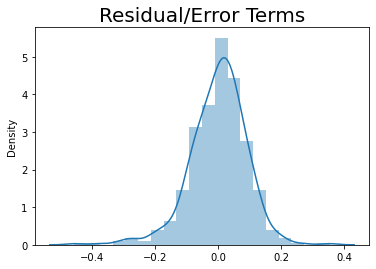

In [283]:
# Ploting 

sns.distplot(res, bins=20)
plt.title("Residual/Error Terms", fontsize=20)
plt.show()

The graph is normally distributed with mean = 0

# Making prediction and model evaluation

In [285]:
df_test.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Rainy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,29.793347,33.27085,63.7917,5.459106,6043
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,32.082500,36.04875,59.2083,7.625404,6211
299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,19.270000,22.85230,81.2917,13.250121,2659
221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,31.433347,34.24915,42.4167,13.417286,4780
152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,29.315000,32.19710,30.5000,19.583229,4968


In [286]:
# Rescaling the test data

num_var = ["temp", "atemp", "hum", "windspeed", "cnt"]

df_test[num_var] = scaler.transform(df_test[num_var])

In [287]:
df_test.head() # data rescaled

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Rainy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029


In [288]:
# Splitting test data into X and y

y_test = df_test.pop("cnt")
X_test = df_test

In [289]:
# Selecting the variables that were part of the final model

col1 = X_train_new.columns

X_test = X_test[col1]

In [290]:
# Add constant

X_test_lm3 = sm.add_constant(X_test)

In [292]:
# Making predictions using the final model (lr3)

y_test_pred = lr3.predict(X_test_lm3)

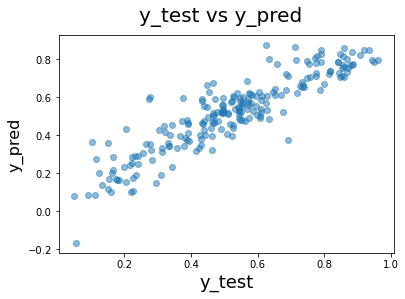

In [293]:
# Evaluate model

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [294]:
# Check R_square

r2_score(y_true=y_test, y_pred=y_test_pred)

0.8161282341346277

<b>Train R-Square = 0.838
Test R-Square = 0.816</b>

# END